## DS 2500
## Module Assignment 2 - Cleaning Data
For this assignment, I am using a dataset that quantifies and measures the different phoenitics of different words and languages. The website to the data can be found [here](http://www.phonetics.ucla.edu/voiceproject/voice.html). This dataset is a candidate for cleaning because of its shape. Namely, the data is spread wide and thingwith multiple columns for time series data. This can be changed to be shorter and deeper, reducing the number of columns and making it easier to gain insights from the data. 

*Important Note* This is very much an incomplete notebook. I am only submitting because I want to get as much credit as I can. It's late, and I would like to get some sleep. I am going to resubmit tomorrow, with the hope that both submissions will be considered. I just wanted to show that I've actually been working on the assignment. I am going to split this submission into two parts. One is my second attempt, and the other is my first attempt. I've been going at this all day (literally around 8 hours), and decided to essentially restart. I barely started to have luck in reshaping the data the way I wanted to. 

# Attempt 2

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
df = pd.read_csv('Voice_Master.csv')
%matplotlib inline

/Users/richardtimpson/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,4,6,13,204,205,206,207,208,209,210,211,212,213) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
prefixes = ['shrF0', 'strF0', 'sF0', 'pF0']
postfixes = [f'means00{i}' for i in range(1,10)] + ["mean"]
acoustic_cols = []
for prefix in prefixes:
    for postfix in postfixes:
        acoustic_cols.append(f'{prefix}_{postfix}')
print(acoustic_cols)
cleaned_df = df[df['Language'] == "English"]
cleaned_df = cleaned_df[['Filename', 'Duration', 'seg_Start', 'seg_End'] + acoustic_cols]

['shrF0_means001', 'shrF0_means002', 'shrF0_means003', 'shrF0_means004', 'shrF0_means005', 'shrF0_means006', 'shrF0_means007', 'shrF0_means008', 'shrF0_means009', 'shrF0_mean', 'strF0_means001', 'strF0_means002', 'strF0_means003', 'strF0_means004', 'strF0_means005', 'strF0_means006', 'strF0_means007', 'strF0_means008', 'strF0_means009', 'strF0_mean', 'sF0_means001', 'sF0_means002', 'sF0_means003', 'sF0_means004', 'sF0_means005', 'sF0_means006', 'sF0_means007', 'sF0_means008', 'sF0_means009', 'sF0_mean', 'pF0_means001', 'pF0_means002', 'pF0_means003', 'pF0_means004', 'pF0_means005', 'pF0_means006', 'pF0_means007', 'pF0_means008', 'pF0_means009', 'pF0_mean']


In [3]:
cleaned_df

,Filename,Duration,seg_Start,seg_End,shrF0_means001,shrF0_means002,shrF0_means003,shrF0_means004,shrF0_means005,shrF0_means006,...,pF0_means001,pF0_means002,pF0_means003,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009,pF0_mean
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,253.54,245.933,229.985,216.3,206.111,...,261.359,254.253,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,230.159,225.345,219.922,215.054,206.275,...,246.716,231.700,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,220.292,212.002,206.283,204.379,202.506,...,248.550,224.196,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481
3,F1July22_sure_normal.mat,285.244,2331.887,2617.131,338.72,344.274,344.57,319.262,262.049,201.77,...,335.212,339.123,344.734,327.634,286.339,222.419,174.925,165.813,166.267,262.623
4,F1July22_sure_normal.mat,268.161,4685.202,4953.363,330.564,347.955,358.345,342.45,294.441,212.475,...,325.049,337.668,354.560,349.013,312.247,293.764,171.109,164.829,167.986,277.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,MPJuly8_sure_normal.mat,253.119,3496.943,3750.062,123.748,107.177,101.041,96.863,99.127,107.005,...,120.839,108.849,102.729,97.462,53.946,44.733,45.104,45.495,45.495,83.542
63,MPJuly8_sure_normal.mat,184.798,5134.435,5319.233,134.239,137.123,111.123,95.914,93.352,94.762,...,131.166,109.398,103.423,97.394,93.955,55.659,46.470,46.391,47.260,80.058
64,MSAugust27_sure_normal.mat,214.635,2597.613,2812.248,159.883,139.641,131.21,190.177,147.503,101.295,...,142.939,140.785,133.914,125.511,115.170,104.163,97.577,94.834,90.198,115.427
65,MSAugust27_sure_normal.mat,179.749,4397.084,4576.833,147.015,132.341,125.051,191.671,201.357,109.499,...,147.698,133.693,126.735,122.882,118.568,112.932,106.285,99.633,94.714,117.499


In [4]:
groups = cleaned_df.groupby('Filename')
group = groups.get_group('F19May20_sure_normal.mat')
# group = group[acoustic_cols]
group
# group.plot()

,Filename,Duration,seg_Start,seg_End,shrF0_means001,shrF0_means002,shrF0_means003,shrF0_means004,shrF0_means005,shrF0_means006,...,pF0_means001,pF0_means002,pF0_means003,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009,pF0_mean
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,253.54,245.933,229.985,216.3,206.111,...,261.359,254.253,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,230.159,225.345,219.922,215.054,206.275,...,246.716,231.700,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,220.292,212.002,206.283,204.379,202.506,...,248.550,224.196,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481


In [5]:
columns = list(group.columns)
melt_vars = [i for i in columns if 'means001' in i]
id_vars = [l for l in columns if l not in melt_vars]
group_melt1 = pd.melt(group, id_vars=id_vars, var_name="acoustic", value_name=f'means001_value')
group_melt1['acoustic'] = group_melt1['acoustic'].str.extract(r'([a-zA-Z0-9]*)_')
group_melt1

,Filename,Duration,seg_Start,seg_End,shrF0_means002,shrF0_means003,shrF0_means004,shrF0_means005,shrF0_means006,shrF0_means007,...,pF0_means003,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009,pF0_mean,acoustic,means001_value
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,253.54,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,shrF0,261.805
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,230.159,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,shrF0,245.889
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,220.292,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,shrF0,244.402
3,F19May20_sure_normal.mat,370.338,2328.799,2699.137,253.54,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,strF0,259.026
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,230.159,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,strF0,242.175
5,F19May20_sure_normal.mat,297.392,4208.542,4505.934,220.292,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,strF0,241.63
6,F19May20_sure_normal.mat,370.338,2328.799,2699.137,253.54,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,sF0,258.994
7,F19May20_sure_normal.mat,297.392,3293.921,3591.313,230.159,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,sF0,240.6
8,F19May20_sure_normal.mat,297.392,4208.542,4505.934,220.292,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,sF0,238.449
9,F19May20_sure_normal.mat,370.338,2328.799,2699.137,253.54,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,pF0,261.359


In [6]:
columns = list(group.columns)
melt_vars = [i for i in columns if 'means002' in i]
id_vars = [l for l in columns if l not in melt_vars]
group_melt2 = pd.melt(group, id_vars=id_vars, var_name="acoustic", value_name=f'means002_value')
group_melt2['acoustic'] = group_melt2['acoustic'].str.extract(r'([a-zA-Z0-9]*)_')
group_melt2

,Filename,Duration,seg_Start,seg_End,shrF0_means001,shrF0_means003,shrF0_means004,shrF0_means005,shrF0_means006,shrF0_means007,...,pF0_means003,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009,pF0_mean,acoustic,means002_value
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,shrF0,253.54
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,shrF0,230.159
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,shrF0,220.292
3,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,strF0,253.061
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,strF0,228.195
5,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,strF0,217.965
6,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,sF0,252.942
7,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,225.390,220.601,216.365,208.037,206.376,212.268,228.100,221.639,sF0,228.314
8,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,212.074,207.558,205.183,201.349,207.424,208.788,196.743,212.481,sF0,217.45
9,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,248.184,232.622,218.465,208.250,196.405,201.626,210.533,225.465,pF0,254.253


In [7]:
group_melt2['means001_value'] = group_melt1['means001_value']
group_melt2

,Filename,Duration,seg_Start,seg_End,shrF0_means001,shrF0_means003,shrF0_means004,shrF0_means005,shrF0_means006,shrF0_means007,...,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009,pF0_mean,acoustic,means002_value,means001_value
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,232.622,218.465,208.250,196.405,201.626,210.533,225.465,shrF0,253.54,261.805
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,220.601,216.365,208.037,206.376,212.268,228.100,221.639,shrF0,230.159,245.889
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,207.558,205.183,201.349,207.424,208.788,196.743,212.481,shrF0,220.292,244.402
3,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,232.622,218.465,208.250,196.405,201.626,210.533,225.465,strF0,253.061,259.026
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,220.601,216.365,208.037,206.376,212.268,228.100,221.639,strF0,228.195,242.175
5,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,207.558,205.183,201.349,207.424,208.788,196.743,212.481,strF0,217.965,241.63
6,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,232.622,218.465,208.250,196.405,201.626,210.533,225.465,sF0,252.942,258.994
7,F19May20_sure_normal.mat,297.392,3293.921,3591.313,245.889,225.345,219.922,215.054,206.275,205.521,...,220.601,216.365,208.037,206.376,212.268,228.100,221.639,sF0,228.314,240.6
8,F19May20_sure_normal.mat,297.392,4208.542,4505.934,244.402,212.002,206.283,204.379,202.506,211.463,...,207.558,205.183,201.349,207.424,208.788,196.743,212.481,sF0,217.45,238.449
9,F19May20_sure_normal.mat,370.338,2328.799,2699.137,261.805,245.933,229.985,216.3,206.111,195.15,...,232.622,218.465,208.250,196.405,201.626,210.533,225.465,pF0,254.253,261.359


In [8]:
def reshape_group_df(df):
    melted_dfs = []
    for i in range(1,10):
        columns = list(df.columns)
        melt_vars = [k for k in columns if f'means00{i}' in k]
        id_vars = [l for l in columns if l not in melt_vars]
        group_melt = pd.melt(df, id_vars=id_vars, var_name="acoustic", value_name=f'{i}')
        group_melt['acoustic'] = group_melt['acoustic'].str.extract(r'([a-zA-Z0-9]*)_')
        melted_dfs.append(group_melt)
    
    reshaped_df = melted_dfs[0]
    for i in range(1, 9):
        reshaped_df[f'{i+1}'] = melted_dfs[i][f'{i+1}']
    cols_to_drop = [i for i in acoustic_cols if 'means001' not in i]
    return reshaped_df.drop(columns=cols_to_drop)

In [9]:
reshaped_df = reshape_group_df(group)
reshaped_df

,Filename,Duration,seg_Start,seg_End,acoustic,1,2,3,4,5,6,7,8,9
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,shrF0,261.805,253.54,245.933,229.985,216.3,206.111,195.15,205.68,209.894
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,shrF0,245.889,230.159,225.345,219.922,215.054,206.275,205.521,218.666,230.357
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,shrF0,244.402,220.292,212.002,206.283,204.379,202.506,211.463,206.619,195.49
3,F19May20_sure_normal.mat,370.338,2328.799,2699.137,strF0,259.026,253.061,244.427,227.961,214.671,204.723,194.794,206.135,209.446
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,strF0,242.175,228.195,224.73,218.791,213.118,207.404,206.061,220.248,227.667
5,F19May20_sure_normal.mat,297.392,4208.542,4505.934,strF0,241.63,217.965,210.735,206.307,203.301,202.246,210.964,204.273,192.478
6,F19May20_sure_normal.mat,370.338,2328.799,2699.137,sF0,258.994,252.942,244.044,227.868,214.713,204.835,195.238,205.947,209.219
7,F19May20_sure_normal.mat,297.392,3293.921,3591.313,sF0,240.6,228.314,224.393,218.49,212.902,207.392,206.087,218.775,229.133
8,F19May20_sure_normal.mat,297.392,4208.542,4505.934,sF0,238.449,217.45,210.428,206.214,203.675,202.115,210.483,204.19,192.766
9,F19May20_sure_normal.mat,370.338,2328.799,2699.137,pF0,261.359,254.253,248.184,232.622,218.465,208.25,196.405,201.626,210.533


In [29]:
indexed = reshaped_df.set_index(['Filename', 'Duration', 'seg_Start', 'seg_End', 'acoustic'])
indexed

1  \
Filename                 Duration seg_Start seg_End  acoustic            
F19May20_sure_normal.mat 370.338  2328.799  2699.137 shrF0     261.805   
                         297.392  3293.921  3591.313 shrF0     245.889   
                                  4208.542  4505.934 shrF0     244.402   
                         370.338  2328.799  2699.137 strF0     259.026   
                         297.392  3293.921  3591.313 strF0     242.175   
                                  4208.542  4505.934 strF0      241.63   
                         370.338  2328.799  2699.137 sF0       258.994   
                         297.392  3293.921  3591.313 sF0         240.6   
                                  4208.542  4505.934 sF0       238.449   
                         370.338  2328.799  2699.137 pF0       261.359   
                         297.392  3293.921  3591.313 pF0       246.716   
                                  4208.542  4505.934 pF0        248.55   

                                                                     2  \
Filename                 Duration seg_Start seg_End  acoustic            
F19May20_sure_normal.mat 370.338  2328.799  2699.137 shrF0      253.54   
                         297.392  3293.921  3591.313 shrF0     230.159   
                                  4208.542  4505.934 shrF0     220.292   
                         370.338  2328.799  2699.137 strF0     253.061   
                         297.392  3293.921  3591.313 strF0     228.195   
                                  4208.542  4505.934 strF0     217.965   
                         370.338  2328.799  2699.137 sF0       252.942   
                         297.392  3293.921  3591.313 sF0       228.314   
                                  4208.542  4505.934 sF0        217.45   
                         370.338  2328.799  2699.137 pF0       254.253   
                         297.392  3293.921  3591.313 pF0         231.7   
                                  4208.542  4505.934 pF0       224.196   

                                                                     3  \
Filename                 Duration seg_Start seg_End  acoustic            
F19May20_sure_normal.mat 370.338  2328.799  2699.137 shrF0     245.933   
                         297.392  3293.921  3591.313 shrF0     225.345   
                                  4208.542  4505.934 shrF0     212.002   
                         370.338  2328.799  2699.137 strF0     244.427   
                         297.392  3293.921  3591.313 strF0      224.73   
                                  4208.542  4505.934 strF0     210.735   
                         370.338  2328.799  2699.137 sF0       244.044   
                         297.392  3293.921  3591.313 sF0       224.393   
                                  4208.542  4505.934 sF0       210.428   
                         370.338  2328.799  2699.137 pF0       248.184   
                         297.392  3293.921  3591.313 pF0        225.39   
                                  4208.542  4505.934 pF0       212.074   

                                                                     4  \
Filename                 Duration seg_Start seg_End  acoustic            
F19May20_sure_normal.mat 370.338  2328.799  2699.137 shrF0     229.985   
                         297.392  3293.921  3591.313 shrF0     219.922   
                                  4208.542  4505.934 shrF0     206.283   
                         370.338  2328.799  2699.137 strF0     227.961   
                         297.392  3293.921  3591.313 strF0     218.791   
                                  4208.542  4505.934 strF0     206.307   
                         370.338  2328.799  2699.137 sF0       227.868   
                         297.392  3293.921  3591.313 sF0        218.49   
                                  4208.542  4505.934 sF0       206.214   
                         370.338  2328.799  2699.137 pF0       232.622   
                         297.392  3293.921  3591.313 pF0       220.601

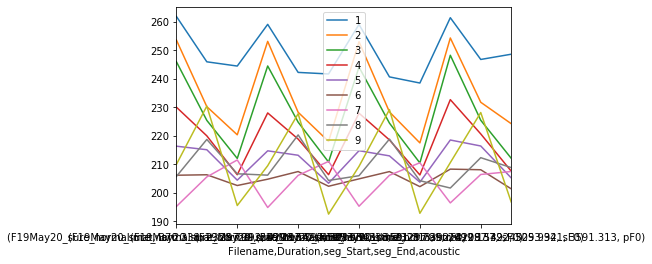

In [35]:
reset = indexed.reset_index(id_vars=['Filename', 'Duration', 'seg_Start', 'seg_End', 'acoustic'])
reset

,Filename,Duration,seg_Start,seg_End,acoustic,1,2,3,4,5,6,7,8,9
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,shrF0,261.805,253.54,245.933,229.985,216.3,206.111,195.15,205.68,209.894
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,shrF0,245.889,230.159,225.345,219.922,215.054,206.275,205.521,218.666,230.357
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,shrF0,244.402,220.292,212.002,206.283,204.379,202.506,211.463,206.619,195.49
3,F19May20_sure_normal.mat,370.338,2328.799,2699.137,strF0,259.026,253.061,244.427,227.961,214.671,204.723,194.794,206.135,209.446
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,strF0,242.175,228.195,224.73,218.791,213.118,207.404,206.061,220.248,227.667
5,F19May20_sure_normal.mat,297.392,4208.542,4505.934,strF0,241.63,217.965,210.735,206.307,203.301,202.246,210.964,204.273,192.478
6,F19May20_sure_normal.mat,370.338,2328.799,2699.137,sF0,258.994,252.942,244.044,227.868,214.713,204.835,195.238,205.947,209.219
7,F19May20_sure_normal.mat,297.392,3293.921,3591.313,sF0,240.6,228.314,224.393,218.49,212.902,207.392,206.087,218.775,229.133
8,F19May20_sure_normal.mat,297.392,4208.542,4505.934,sF0,238.449,217.45,210.428,206.214,203.675,202.115,210.483,204.19,192.766
9,F19May20_sure_normal.mat,370.338,2328.799,2699.137,pF0,261.359,254.253,248.184,232.622,218.465,208.25,196.405,201.626,210.533


In [63]:
groups = reset.groupby(['Filename', 'Duration', 'seg_Start', 'seg_End'])
first_group_name = ('F19May20_sure_normal.mat',
  297.392,
    3293.921,
  3591.313,)
group = groups.get_group(first_group_name)
group

,Filename,Duration,seg_Start,seg_End,acoustic,1,2,3,4,5,6,7,8,9
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,shrF0,245.889,230.159,225.345,219.922,215.054,206.275,205.521,218.666,230.357
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,strF0,242.175,228.195,224.73,218.791,213.118,207.404,206.061,220.248,227.667
7,F19May20_sure_normal.mat,297.392,3293.921,3591.313,sF0,240.6,228.314,224.393,218.49,212.902,207.392,206.087,218.775,229.133
10,F19May20_sure_normal.mat,297.392,3293.921,3591.313,pF0,246.716,231.7,225.39,220.601,216.365,208.037,206.376,212.268,228.1


In [64]:
melt = pd.melt(group, id_vars=['Filename', 'Duration', 'seg_Start', 'seg_End', 'acoustic'])
melt

,Filename,Duration,seg_Start,seg_End,acoustic,variable,value
0,F19May20_sure_normal.mat,297.392,3293.921,3591.313,shrF0,1,245.889
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,strF0,1,242.175
2,F19May20_sure_normal.mat,297.392,3293.921,3591.313,sF0,1,240.6
3,F19May20_sure_normal.mat,297.392,3293.921,3591.313,pF0,1,246.716
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,shrF0,2,230.159
5,F19May20_sure_normal.mat,297.392,3293.921,3591.313,strF0,2,228.195
6,F19May20_sure_normal.mat,297.392,3293.921,3591.313,sF0,2,228.314
7,F19May20_sure_normal.mat,297.392,3293.921,3591.313,pF0,2,231.7
8,F19May20_sure_normal.mat,297.392,3293.921,3591.313,shrF0,3,225.345
9,F19May20_sure_normal.mat,297.392,3293.921,3591.313,strF0,3,224.73


In [66]:
pivot = pd.pivot(melt, index='variable', columns='acoustic',values='value')
pivot

acoustic,pF0,sF0,shrF0,strF0
variable,,,,
1,246.716,240.6,245.889,242.175
2,231.7,228.314,230.159,228.195
3,225.39,224.393,225.345,224.73
4,220.601,218.49,219.922,218.791
5,216.365,212.902,215.054,213.118
6,208.037,207.392,206.275,207.404
7,206.376,206.087,205.521,206.061
8,212.268,218.775,218.666,220.248
9,228.1,229.133,230.357,227.667


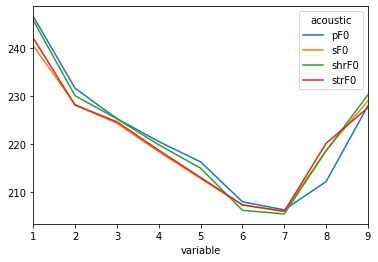

In [67]:
pivot.plot()

In [56]:
melt = pd.melt(reset, id_vars=['Filename', 'Duration', 'seg_Start', 'seg_End', 'acoustic'])
melt

,Filename,Duration,seg_Start,seg_End,acoustic,variable,value
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137,shrF0,1,261.805
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,shrF0,1,245.889
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934,shrF0,1,244.402
3,F19May20_sure_normal.mat,370.338,2328.799,2699.137,strF0,1,259.026
4,F19May20_sure_normal.mat,297.392,3293.921,3591.313,strF0,1,242.175
...,...,...,...,...,...,...,...
103,F19May20_sure_normal.mat,297.392,3293.921,3591.313,sF0,9,229.133
104,F19May20_sure_normal.mat,297.392,4208.542,4505.934,sF0,9,192.766
105,F19May20_sure_normal.mat,370.338,2328.799,2699.137,pF0,9,210.533
106,F19May20_sure_normal.mat,297.392,3293.921,3591.313,pF0,9,228.1


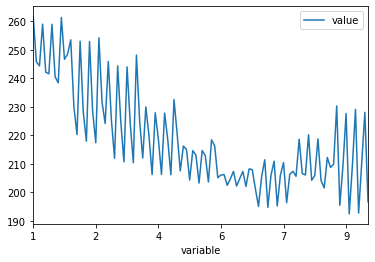

In [55]:
melt.plot(x='variable', y='value')

In [57]:
pivot = pd.pivot(melt, index='variable', columns='acoustic',values='value')
pivot

ValueError: Index contains duplicate entries, cannot reshape

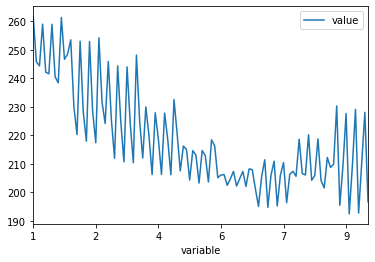

In [51]:
indexed.plot(y='value')

In [42]:
pivot = pd.pivot(melt, index=['Filename', 'Duration', 'seg_Start', 'seg_End', 'acoustic'], columns='variable', values='value')
pivot

ValueError: Length of passed values is 108, index implies 5

In [25]:
stacked = melt.set_index('variable')
stacked
# pivot = pd.pivot(melt, index='variable', columns='acoustic', values='value')
# pivot

,Filename,Duration,seg_Start,seg_End,acoustic,value
variable,,,,,,
1,F19May20_sure_normal.mat,370.338,2328.799,2699.137,shrF0,261.805
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,shrF0,245.889
1,F19May20_sure_normal.mat,297.392,4208.542,4505.934,shrF0,244.402
1,F19May20_sure_normal.mat,370.338,2328.799,2699.137,strF0,259.026
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313,strF0,242.175
...,...,...,...,...,...,...
9,F19May20_sure_normal.mat,297.392,3293.921,3591.313,sF0,229.133
9,F19May20_sure_normal.mat,297.392,4208.542,4505.934,sF0,192.766
9,F19May20_sure_normal.mat,370.338,2328.799,2699.137,pF0,210.533


# Attempt 1
This attempt is very messy and mostly gibberish. I tried a lot of different things, and used some of them to pull from for my second attempt

In [ ]:
import pandas as pd

Read in the data, hoping that the warning will not give us any trouble. Will depend on which columsn we are interested in

In [ ]:
df = pd.read_csv('Voice_Master.csv')

Get an idea of what the data is describing

In [ ]:
df.head()

In [ ]:
df.tail()

# Reshape data
The value that we interested in are the different quantitative metrics that describe the signal of the spoken word. There are several values (shrF0_mean, H1_mean, H2_mean, H4_mean, H1-H2_mean etc), and each of these values has a corresponding column that represents the mean of that value at a specific time interval. The time intervals range from 001 to 009

In [ ]:
column_list = list(df.columns)
# these are not all of the measurements, but give a good idea of what the data is presenting
acoustic_measurements = ['H1', 'H2', 'H4', 'A1', 'A2', 'A3', 'shrF0', 'strF0', 'sF0', 'pF0']
def in_measurements(column):
    for a in acoustic_measurements:
        if a in column:
            return True
    return False
filtered_columns = list(filter(in_measurements, column_list))
print(filtered_columns)

The data splits multiple samples from the same audio file into different rows, which correspond with a word being spoken in an audio file. Each of these rows has repeated information in several columns as it stays consistent across the same speaker. The value count of each file name corresponds to how many times a word was spoken for that specific file. 

In [ ]:
df['Filename'].value_counts()

This means that we have several samples from one audio file, and within each of those samples, samples of the acoustic measurements at different intervals (9 to be exact).

In [ ]:
# group by filename, which gives us many data frames for each file name
groups = df.groupby('Filename')

# this corresponds with the largest group shown by the value counts above
largest_group_df = groups.get_group('M24April09_shi_normal.mat')

# we want to get how many unique values there are for each columns
unique_columns = largest_group_df.nunique()

# this gives us a series where the values are only one
columns_repeat = unique_columns[unique_columns == 1]

# the corresponding list is the all of the columns which have repeats for every 
# row in the group
list_columns_repeat = list(columns_repeat.index)
print(list_columns_repeat)

# Stack the data
We would like to index the data such that all of the repeat information in the columns for the same file is not repeated

In [ ]:
stacked_df = df.set_index(list_columns_repeat)
melt_df = stacked_df
working_additions = []
for i in range(1,3):
    print(i)
    string = f'means00{i}'
    columns = list(melt_df.columns)
    melt_vars = [k for k in columns if string in k]
    id_vars =[l for l in columns if l not in melt_vars]
    id_vars = [l for l in id_vars if l not in working_additions]
    var_name = f"acoustic_means_00{i}"
    value_name = f"means_00{i}"
    melt_df = pd.melt(melt_df, id_vars=id_vars, value_vars=melt_vars, var_name=var_name, value_name=value_name)
    working_additions.append(var_name)
    working_additions.append(value_name)
melt_df

In [ ]:
# largest_group_df_indexed
columns = list(df.columns)
melt_vars = [i for i in columns if 'means001' in i]
id_vars =[l for l in columns if l not in melt_vars]
melt_df = pd.melt(df, id_vars=id_vars)
melt_df

In [ ]:
# means = [f'shrF0_means00{i}' for i in range(1,10)]
# melt_vars = ['shf_mean'] + means
melt_vars = ['shrF0_means001']
id_vars =[l for l in list(largest_group_df.columns) if l not in melt_vars]
largest_group_melt_df = pd.melt(largest_group_df, id_vars=id_vars)
largest_group_melt_df